In [42]:
%matplotlib inline
from pynq.pmods import Grove_IMU
from IPython import display
from ipywidgets import widgets
import numpy as np
import scipy.signal as signal
import time
import matplotlib.pyplot as plt


# initialize Grove IMU on PMOD 1 (JB) and grove id 4 (GR4).
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
# NOTE: only GR4 can be used for the Grove IMU
imu = Grove_IMU(1,4)

#Prova creazione array
campioni=300
accX=np.empty(campioni)
accY=np.empty(campioni)
accZ=np.empty(campioni)
pitch_arr=np.empty(campioni)
for i in range(campioni):

        # get data from accelerometer
        accl = imu.get_accl()

        print("Accelerometer x: " + str(accl[0]))
        accX[i] = accl[0]
        print("Accelerometer y: " + str(accl[1]))
        accY[i] = accl[1]
        print("Accelerometer z: " + str(accl[2]))
        print("")
        accZ[i] = accl[2]
        
        argomento= accl[1]/np.sqrt(accl[0]*accl[0]*accl[1]*accl[1])
        pitch = np.arctan(argomento)
        pitch_arr[i] = pitch
        print("Pitch:"+str(pitch))
        display.clear_output(wait=True)
        time.sleep(0.1)
              
np.savetxt("DataXmov.npy", accX)
np.savetxt("DataYmov.npy", accY)
np.savetxt("DataZmov.npy", accZ)
np.savetxt("DataPmov.npy",pitch_arr)

Accelerometer x: 0.58
Accelerometer y: 0.25
Accelerometer z: 0.8

Pitch:1.04521253324


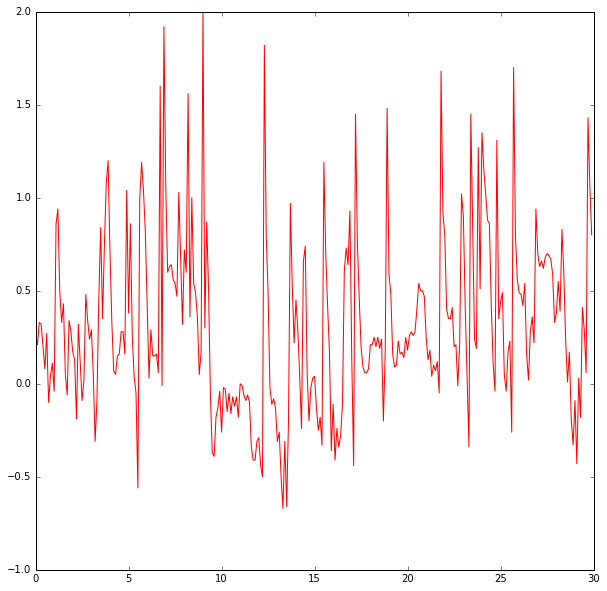

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
dataZ=np.loadtxt("DataZmov.npy")
dataY=np.loadtxt("DataYmov.npy")
dataP=np.loadtxt("DataPitchmov.npy")
X=np.arange(0,30,0.1)
plt.figure(figsize=(10,10))
plt.plot(X,dataZ,color='red')
plt.show()

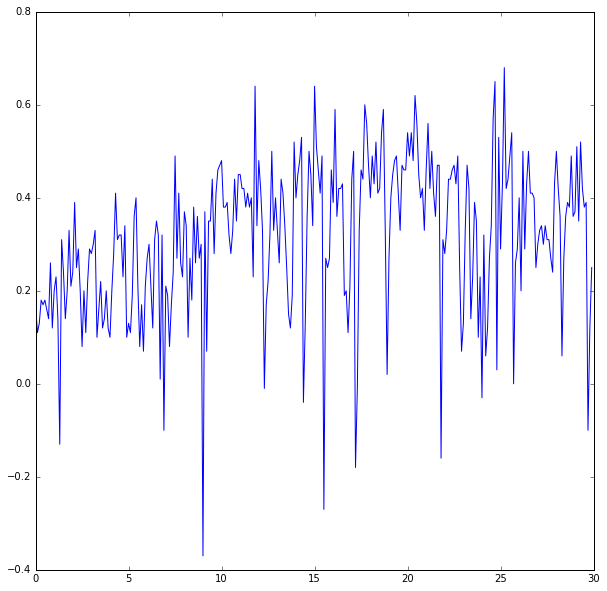

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
dataY=np.loadtxt("DataYmov.npy")
X=np.arange(0,30,0.1)
plt.figure(figsize=(10,10))
plt.plot(X,dataY,color='b')
plt.show()


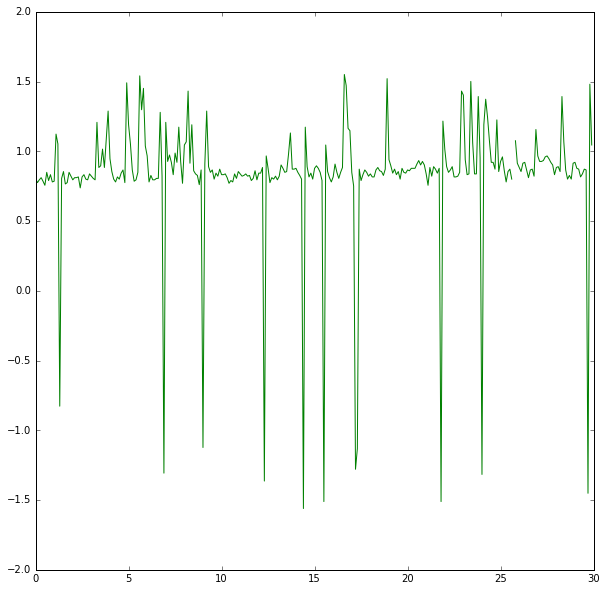

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
dataP=np.loadtxt("DataPmov.npy")
X=np.arange(0,30,0.1)
plt.figure(figsize=(10,10))
plt.plot(X,dataP,color='g')
plt.show()